In [38]:
import numpy as np 
import pandas as pd

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("weather_data.csv")

In [41]:
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [42]:
df.shape

(1000000, 6)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [44]:
df.nunique()

Location                 10
Date_Time            959526
Temperature_C       1000000
Humidity_pct        1000000
Precipitation_mm    1000000
Wind_Speed_kmh      1000000
dtype: int64

In [45]:
df['Date_Time']=pd.to_datetime(df['Date_Time'])
df.head()


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [46]:
loc = df['Location']

In [47]:
loc.unique()

array(['San Diego', 'Philadelphia', 'San Antonio', 'San Jose', 'New York',
       'Houston', 'Dallas', 'Chicago', 'Los Angeles', 'Phoenix'],
      dtype=object)

In [48]:
def region_analyser(region):
    data=df[df['Location']==region]
    data=data.sort_values('Date_Time')
    data=data.reset_index()
    data=data.drop('index',axis=1)
    data=data.drop('Location',axis=1)
    data=data.set_index('Date_Time')
    return data

In [49]:
region_analyser('New York')

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,
2024-01-01 00:04:45,37.991348,64.202440,0.050219,24.157506
2024-01-01 00:04:52,8.191753,62.335497,8.601657,0.612134
2024-01-01 00:04:55,26.772471,87.385380,4.965877,8.243974
2024-01-01 00:08:07,9.503127,76.844316,8.458509,14.291018
2024-01-01 00:09:15,37.375306,44.161119,5.943673,1.220043
...,...,...,...,...
2024-05-18 19:24:37,14.096417,41.007459,6.508045,20.662923
2024-05-18 19:27:32,19.017720,71.363038,0.212933,10.161869
2024-05-18 19:29:20,39.699343,48.625874,9.560762,28.757319


In [50]:
region_analyser('Chicago')

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,
2024-01-01 00:03:25,5.222404,46.395687,6.984159,1.219788
2024-01-01 00:07:14,-6.403267,42.400326,0.451659,0.979239
2024-01-01 00:09:36,8.227097,58.197003,9.686955,10.769515
2024-01-01 00:10:35,-2.955866,86.983992,0.783134,20.737256
2024-01-01 00:10:59,28.382266,35.755630,0.064871,3.502880
...,...,...,...,...
2024-05-18 19:30:27,18.420175,37.991891,0.220687,1.380293
2024-05-18 19:31:33,27.795419,35.333834,0.227935,10.277667
2024-05-18 19:37:19,8.758851,44.499215,3.669220,29.218211


In [51]:
region_analyser('San Diego')

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,
2024-01-01 00:00:31,-8.090262,81.472454,5.435076,7.609853
2024-01-01 00:01:10,-4.535508,81.416645,1.715090,10.192158
2024-01-01 00:01:47,11.480192,80.943070,8.375043,23.057915
2024-01-01 00:02:40,-2.776906,69.075143,4.057751,14.997110
2024-01-01 00:02:47,28.771493,34.259600,4.018268,14.299193
...,...,...,...,...
2024-05-18 19:36:16,0.257989,86.855351,7.878921,0.467041
2024-05-18 19:37:59,19.485015,30.633187,4.499932,1.665716
2024-05-18 19:40:02,-0.162799,30.879821,4.922829,24.418990


In [52]:
def feature_analyzer(region,feature,rows):
    data=region_analyser(region)
    
    plt.subplot(2,1,1)
    data[feature].head(rows).plot()
    plt.axhline(data[feature].mean(),color='k',linestyle='--',linewidth=2.5)
    plt.axhline(data[feature].median(),color='g',linestyle='--',linewidth=2.5)
    plt.axhline(data[feature].mode()[0],color='m',linestyle='--',linewidth=3)
    plt.legend()
    plt.grid()
    
    plt.subplot(2,1,2)
    sns.kdeplot(data[feature].head(rows))
    plt.axvline(data[feature].mean(),color='k',linestyle='--',linewidth=2.5)
    plt.axvline(data[feature].median(),color='g',linestyle='--',linewidth=2.5)
    plt.axvline(data[feature].mode()[0],color='m',linestyle='--',linewidth=3)
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    

/tmp/ipykernel_20290/346735624.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


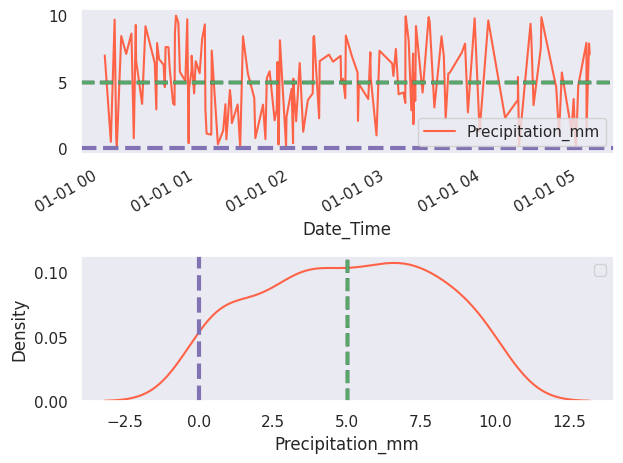

In [53]:
feature_analyzer('Chicago','Precipitation_mm',150)


/tmp/ipykernel_20290/346735624.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


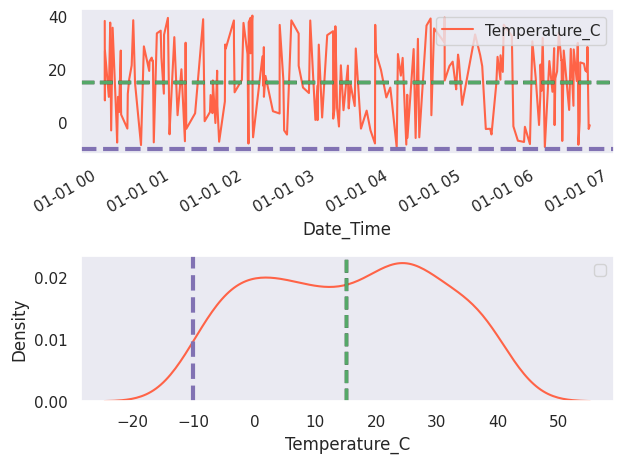

In [54]:


feature_analyzer('New York','Temperature_C',200)



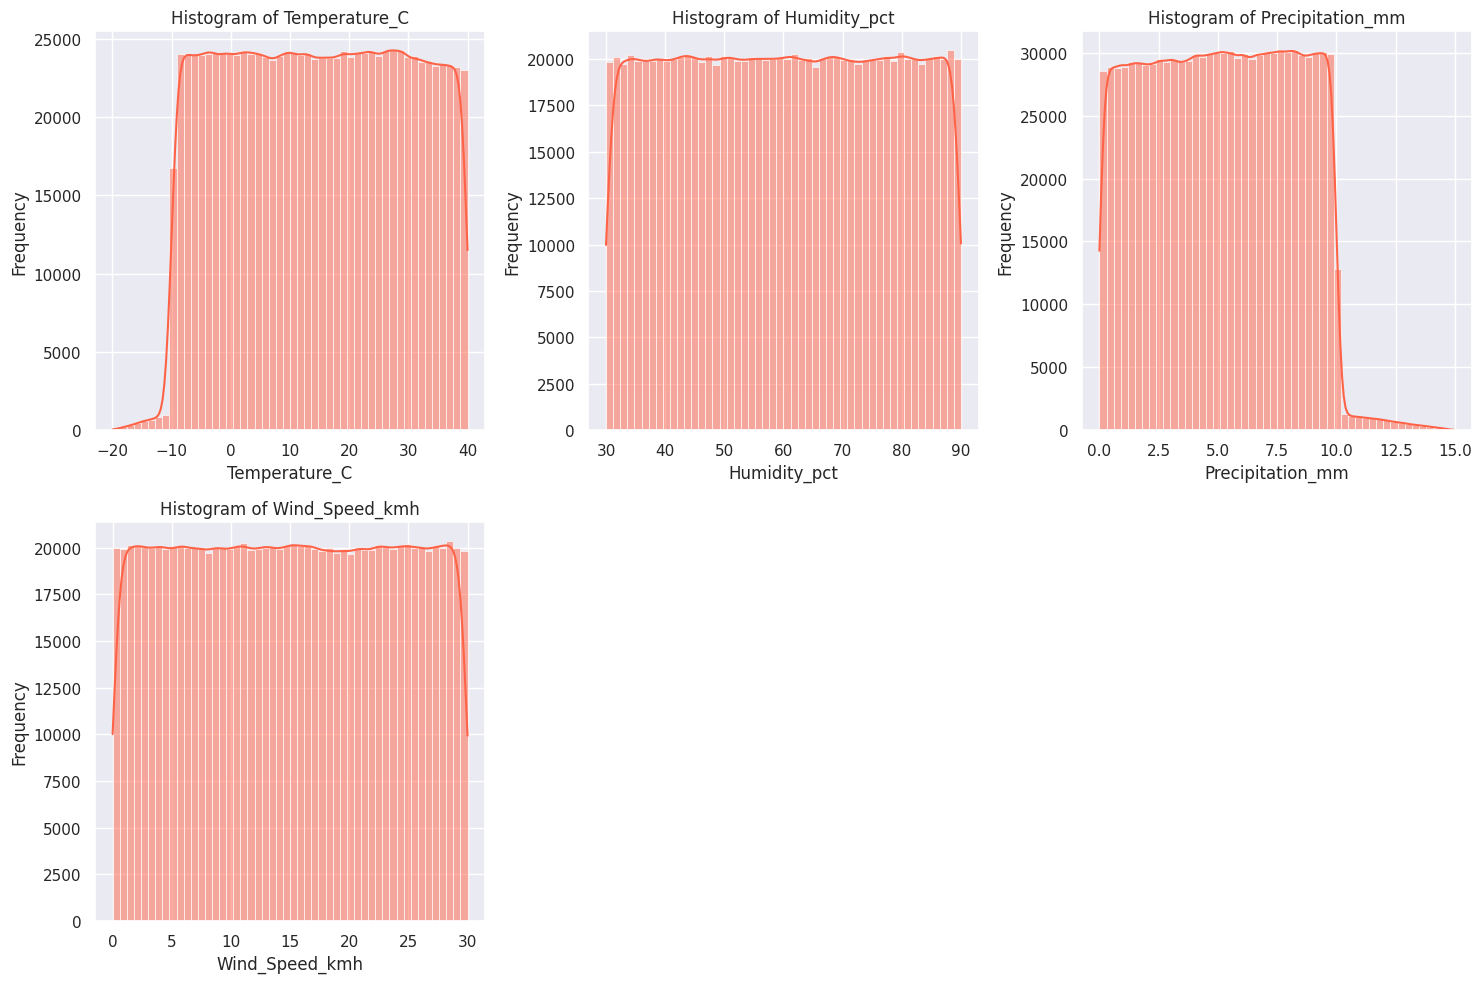

In [55]:

numerical = df.select_dtypes(include=['float64', 'int64']).columns


num_columns = 3
num_rows = -(-len(numerical) // num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))


axes = axes.flatten()

for i, column in enumerate(numerical):
    sns.histplot(df[column], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



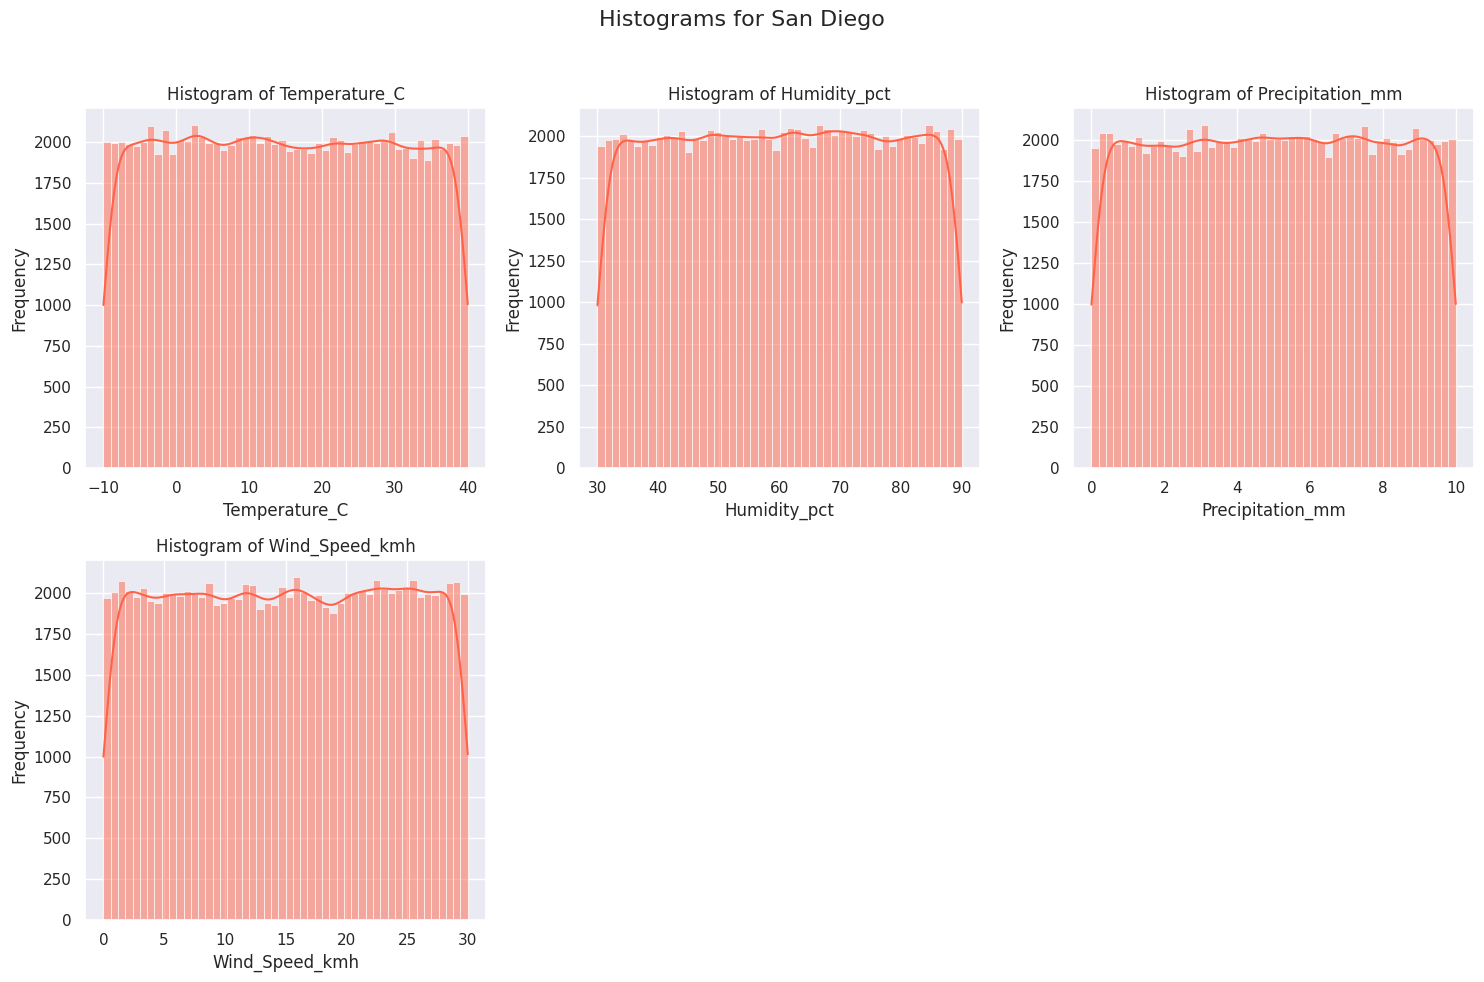

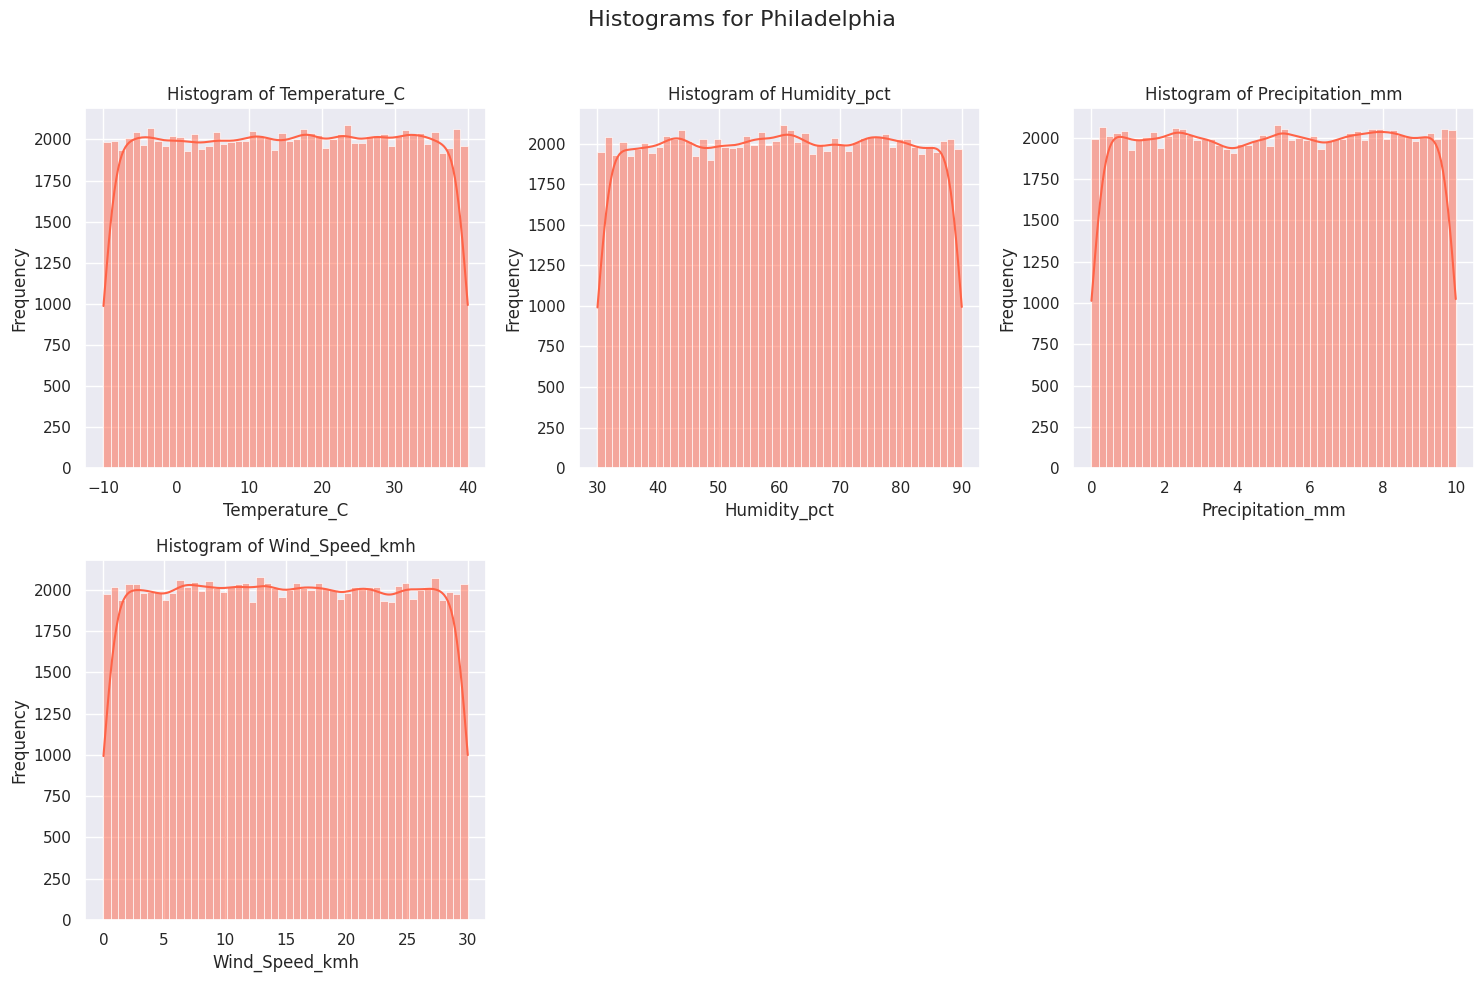

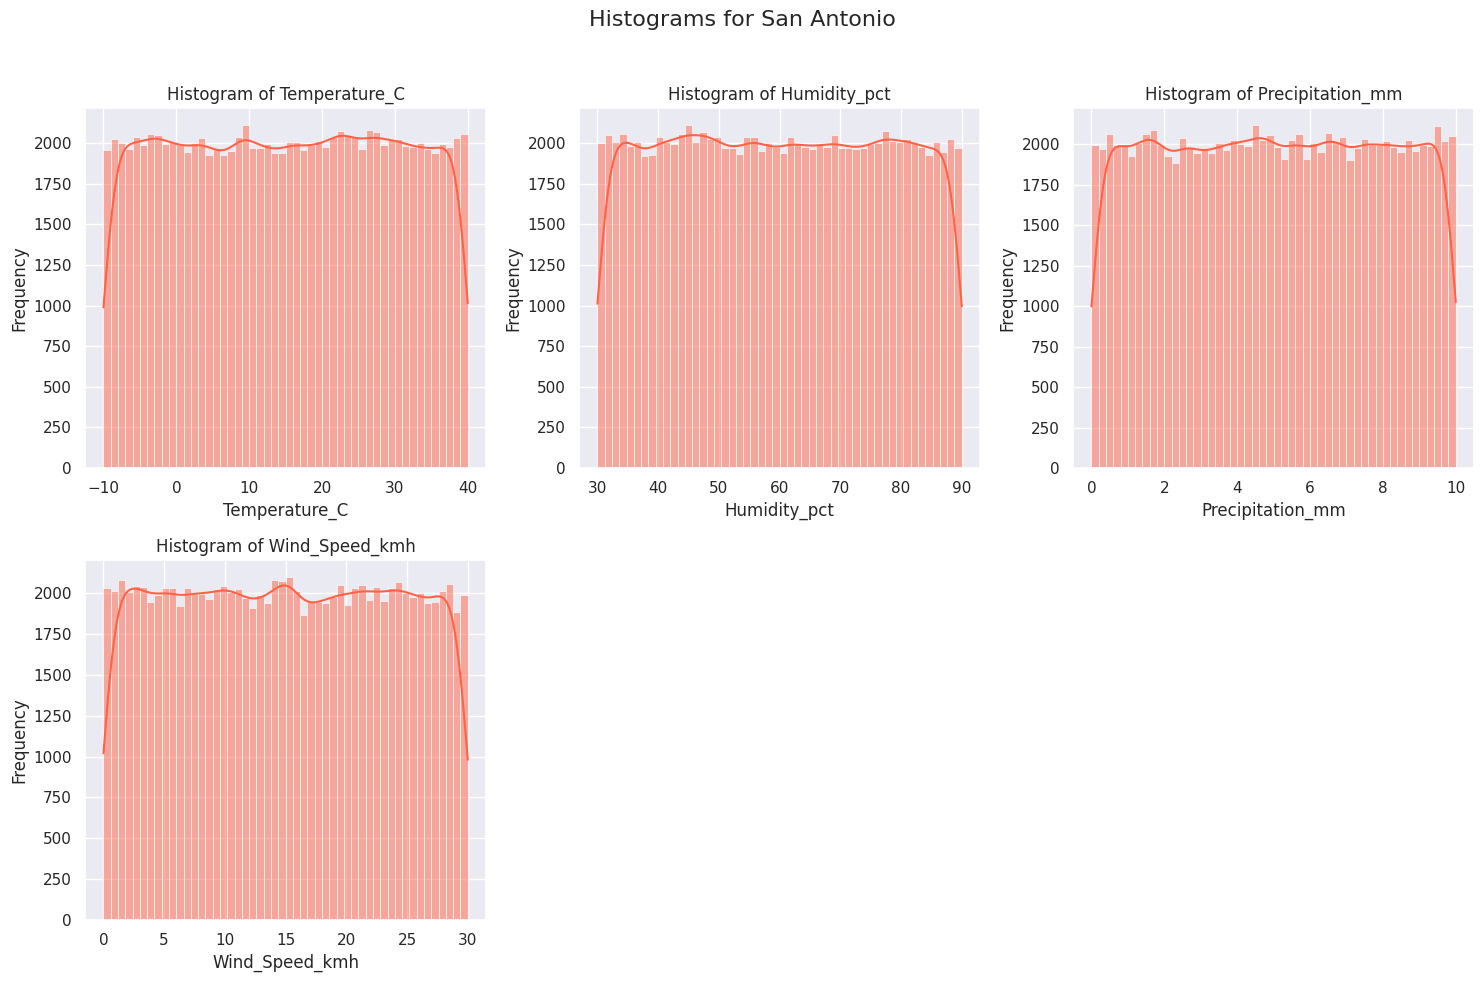

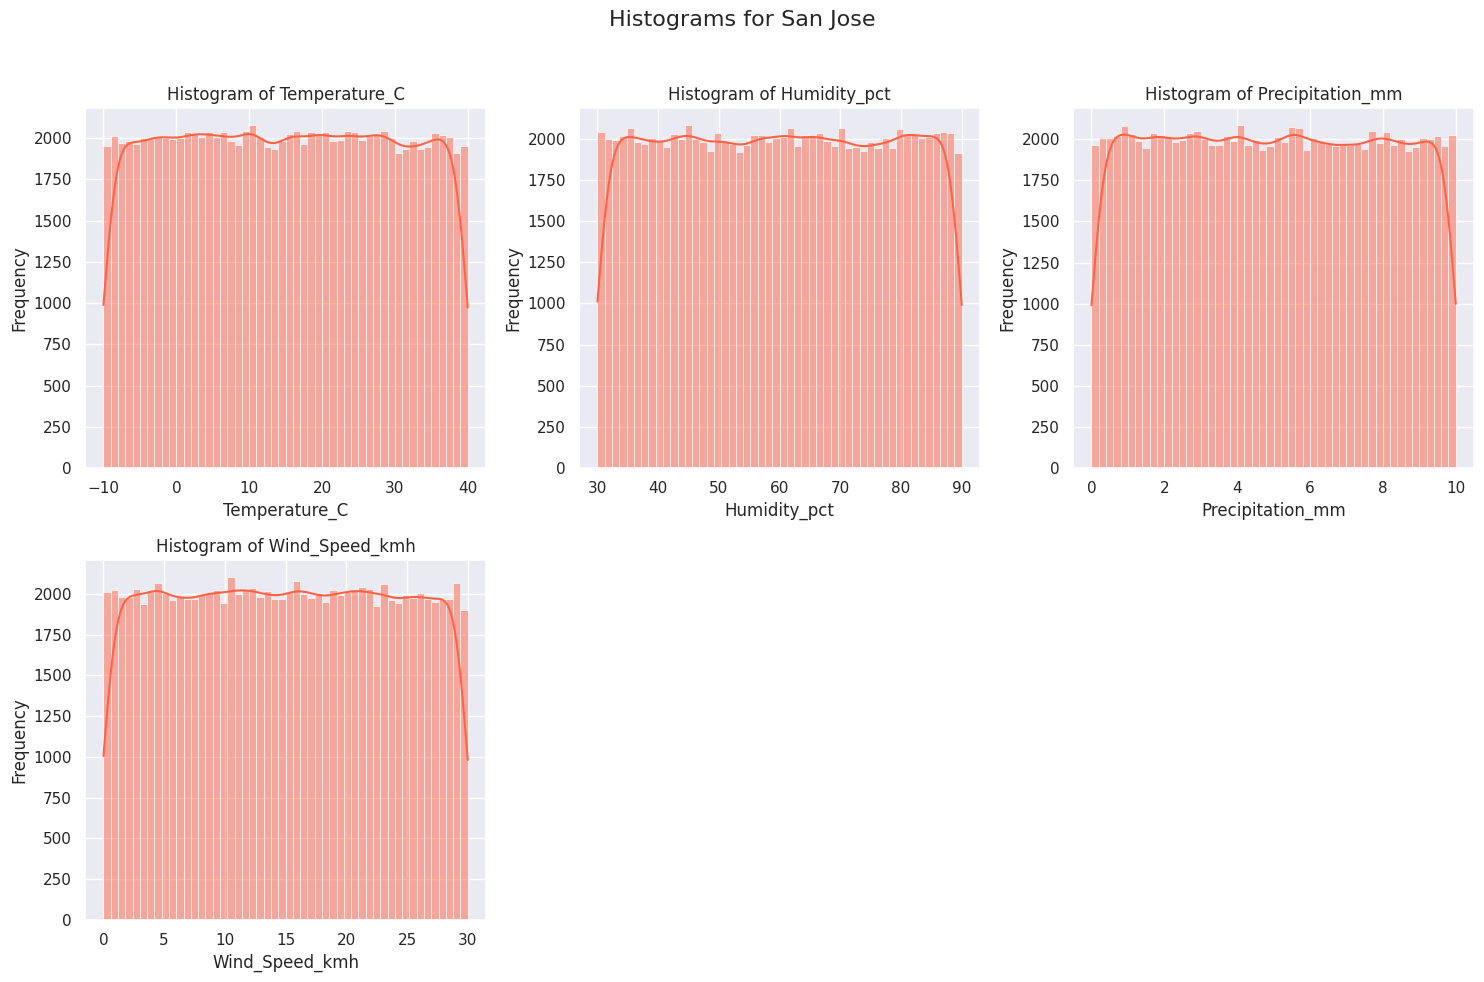

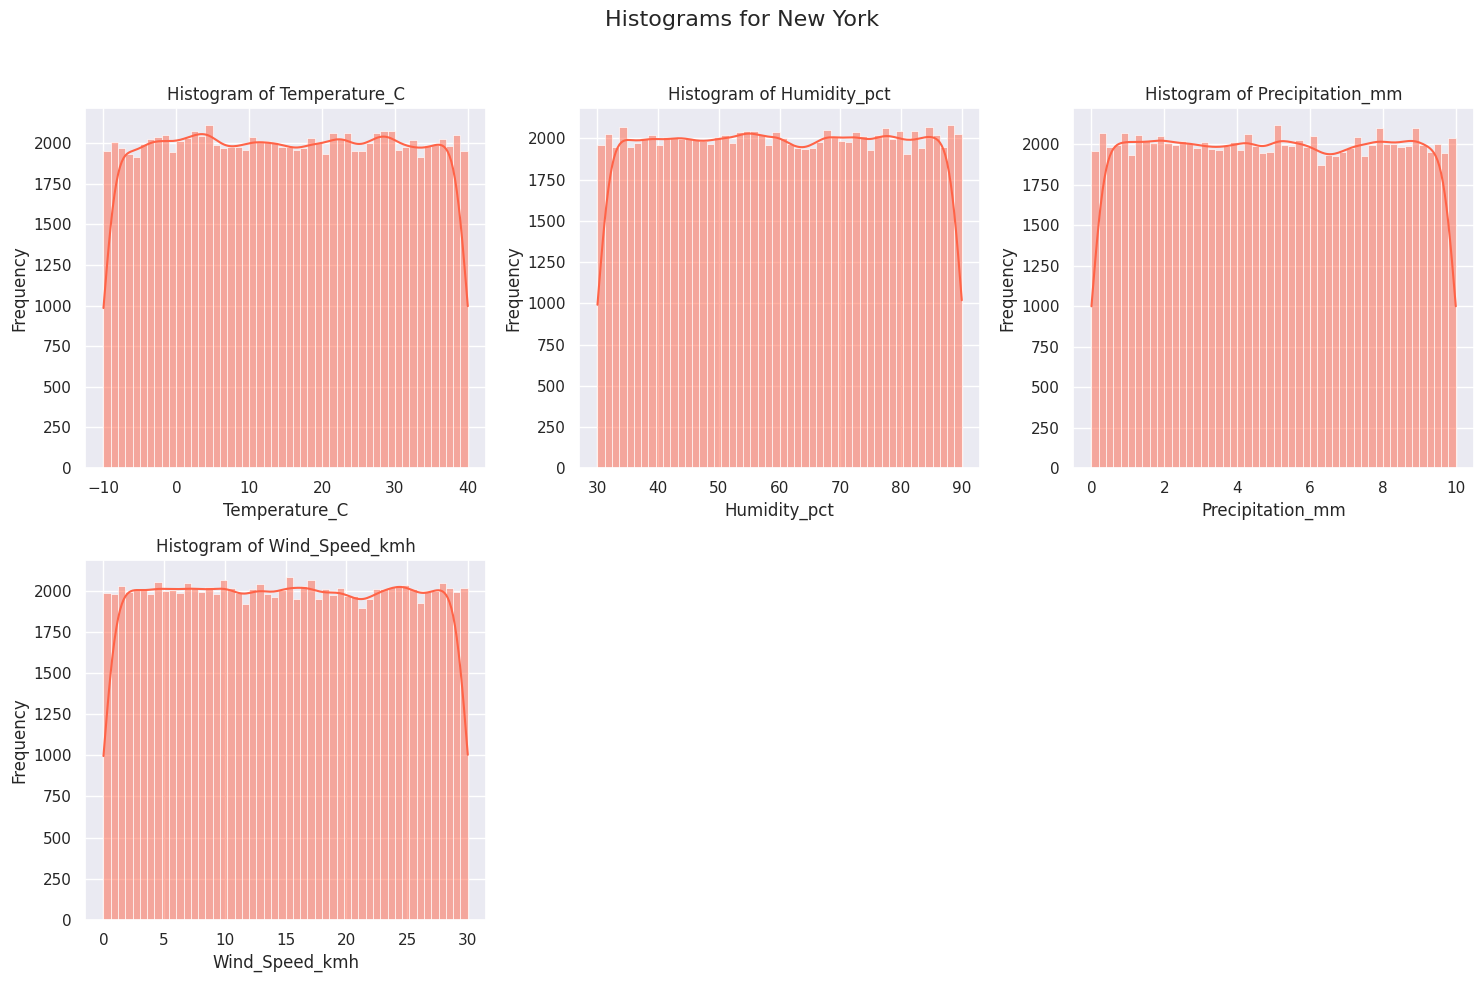

In [56]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

locations = df['Location'].unique()

for location in locations:
    df_location = df[df['Location'] == location]
    
    num_columns = len(numerical)
    num_rows = (num_columns + 2) // 3 
    


    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.suptitle(f'Histograms for {location}', fontsize=16)
    
    for i, column in enumerate(numerical):
        row = i // 3
        col = i % 3
        sns.histplot(df_location[column], kde=True, bins=50, ax=axes[row, col])
        axes[row, col].set_title(f'Histogram of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')
    
    # Hiding any empty subplots
    for j in range(i + 1, num_rows * 3):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
    plt.show()



In [ ]:
# Ensure the 'Date_Time' column is of string type
df['Date_Time'] = df['Date_Time'].astype(str)

# Split the 'Date_Time' column into 'Date' and 'Time' columns
df[['Date', 'Time']] = df['Date_Time'].str.split(' ', expand=True)

# Extract the month number from the 'Date' column
df['Month_num'] = df['Date'].str.split("-", expand=True)[1]

# Dictionary to map month numbers to month names
months = {
    '01': "January", '02': "February", '03': "March",
    '04': "April", '05': "May", '06': "June",
    '07': "July", '08': "August", '09': "September",
    '10': "October", '11': "November", '12': "December"
}

# Function to convert month number to month name
def convert_mon(x):
    return months.get(x)

# Apply the function to create a new 'month' column with month names
df['month'] = df['Month_num'].apply(lambda x: convert_mon(x))

# Check the resulting DataFrame
#print(df)


In [ ]:
df['Hour']= df['Time'].str.split(':', expand=True)[0]

def convert_hour(x):
    if x in ['04','05', '06']:
        x="Dawn"
    elif x in ['07','08','09','10', '11']:
        x="Morning"
    elif x=='12':
        x="Noon"
    elif x in['13', '14', '15', '16']:
        x="AfterNoon"
    elif x in ['17', '18', '19']:
        x="Evening"
    else:
        x="Night"
    return x

df['Time of day']= df['Hour'].apply(lambda x: convert_hour(x))

df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Date,Time,Month_num,month,Hour,Time of day
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,2024-01-14,21:12:46,01,January,21,Night
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,2024-05-17,15:22:10,05,May,15,AfterNoon
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,2024-05-11,09:30:59,05,May,09,Morning
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,2024-02-26,17:32:39,02,February,17,Evening
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,2024-04-29,13:23:51,04,April,13,AfterNoon


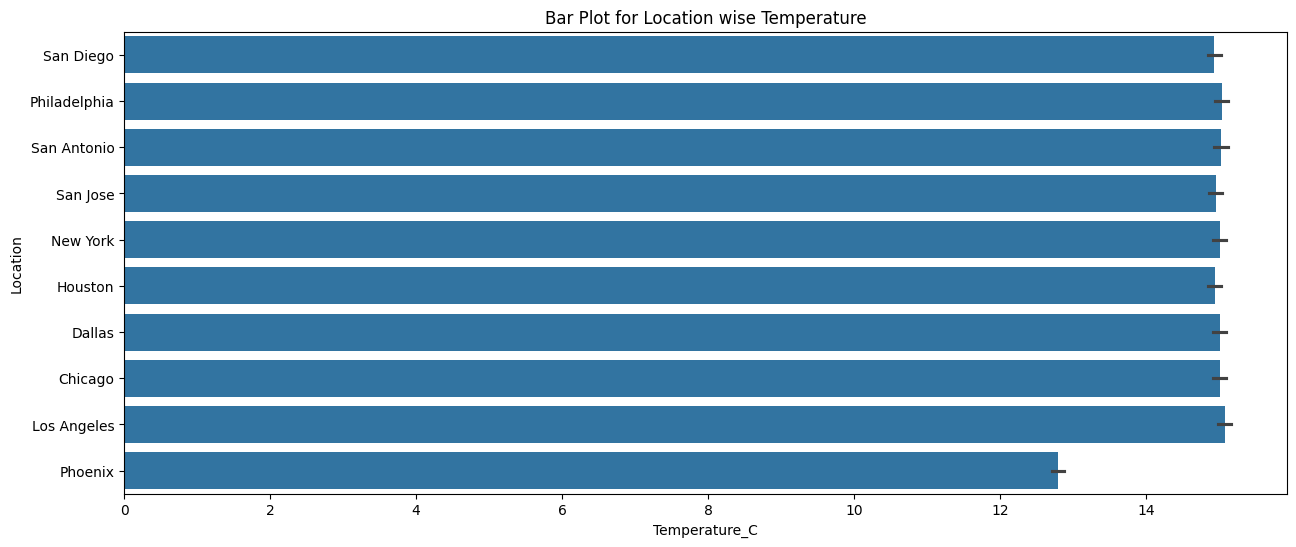

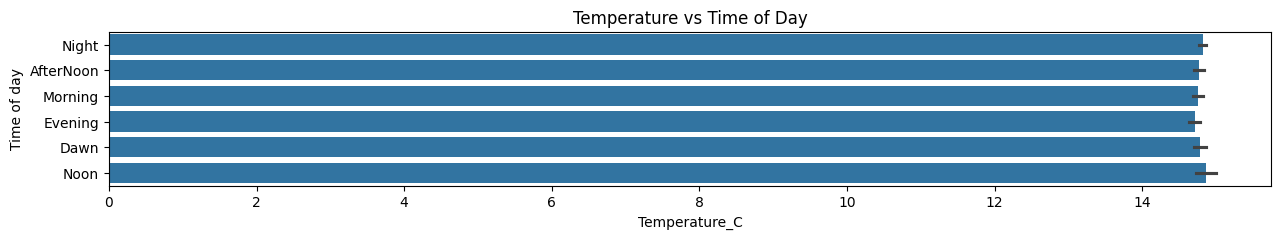

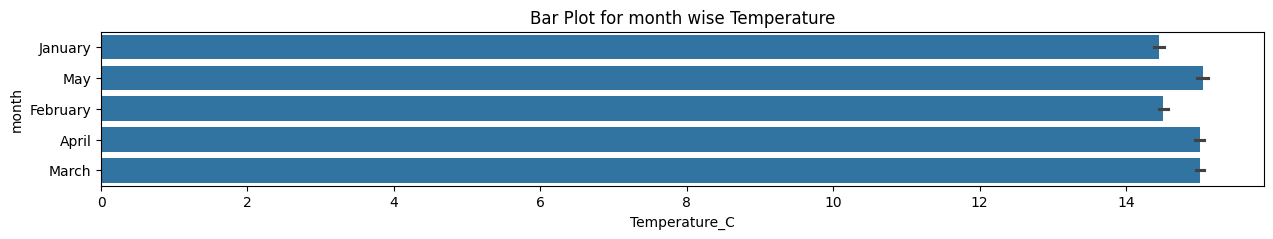

In [ ]:

plt.figure(figsize=(15, 6))
sns.barplot(x='Temperature_C', y='Location', data=df)
plt.title('Bar Plot for Location wise Temperature')
plt.show()


plt.figure(figsize=(15, 2))
sns.barplot(x='Temperature_C', y='Time of day', data=df)
plt.title('Temperature vs Time of Day')
plt.show()



plt.figure(figsize=(15, 2))
sns.barplot(x='Temperature_C', y='month', data=df)
plt.title('Bar Plot for month wise Temperature')
plt.show()

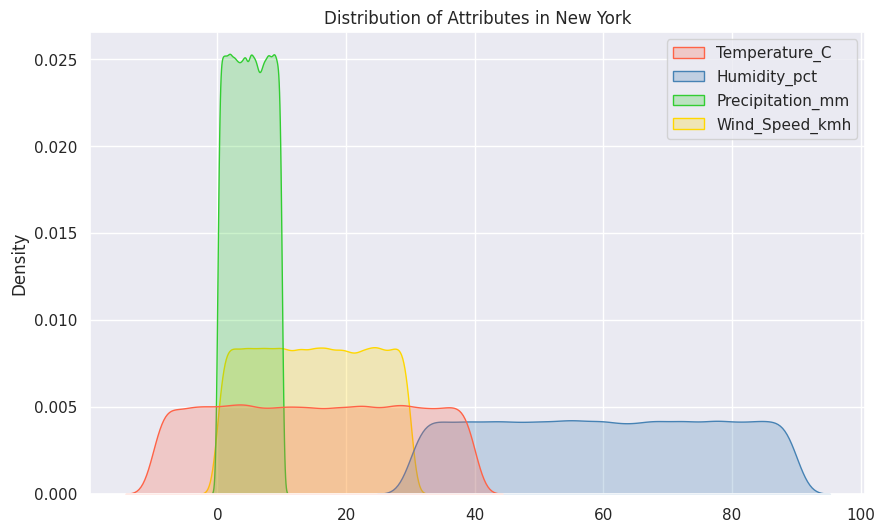

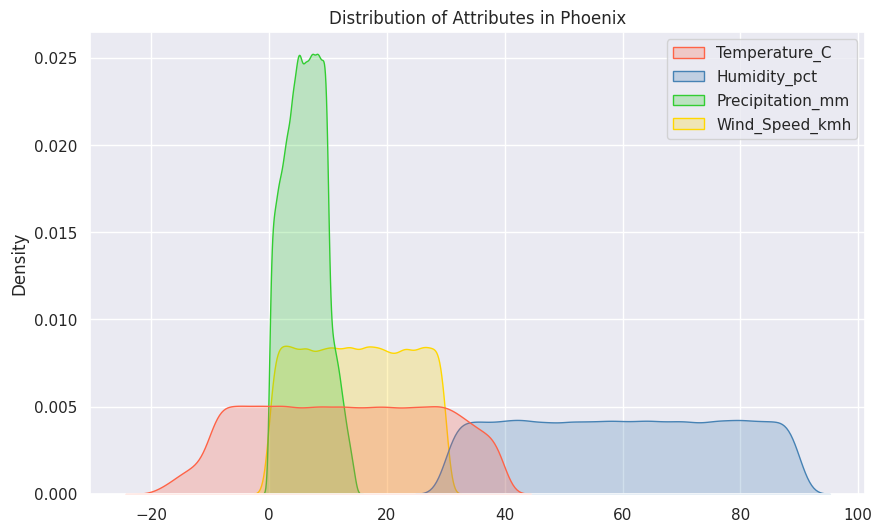

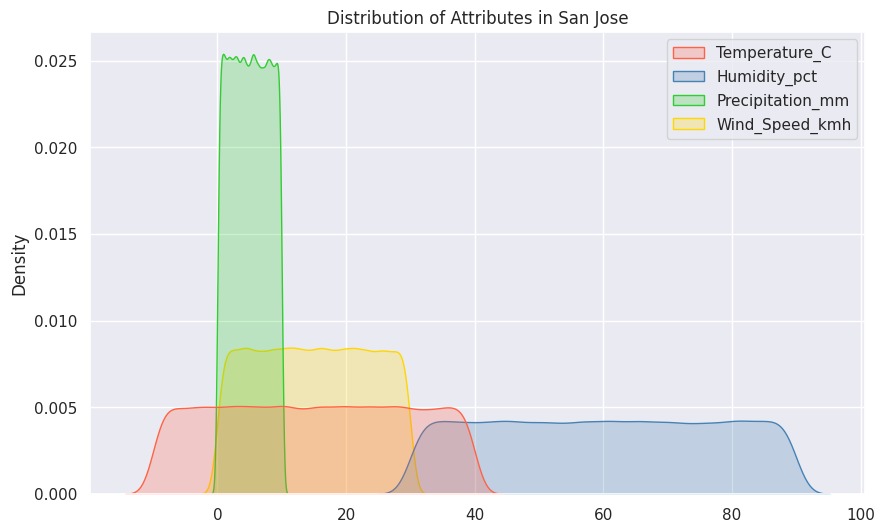

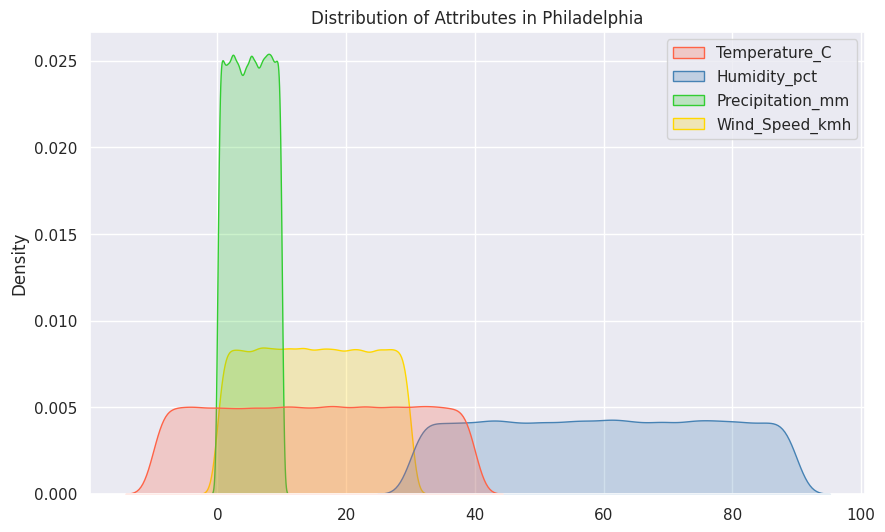

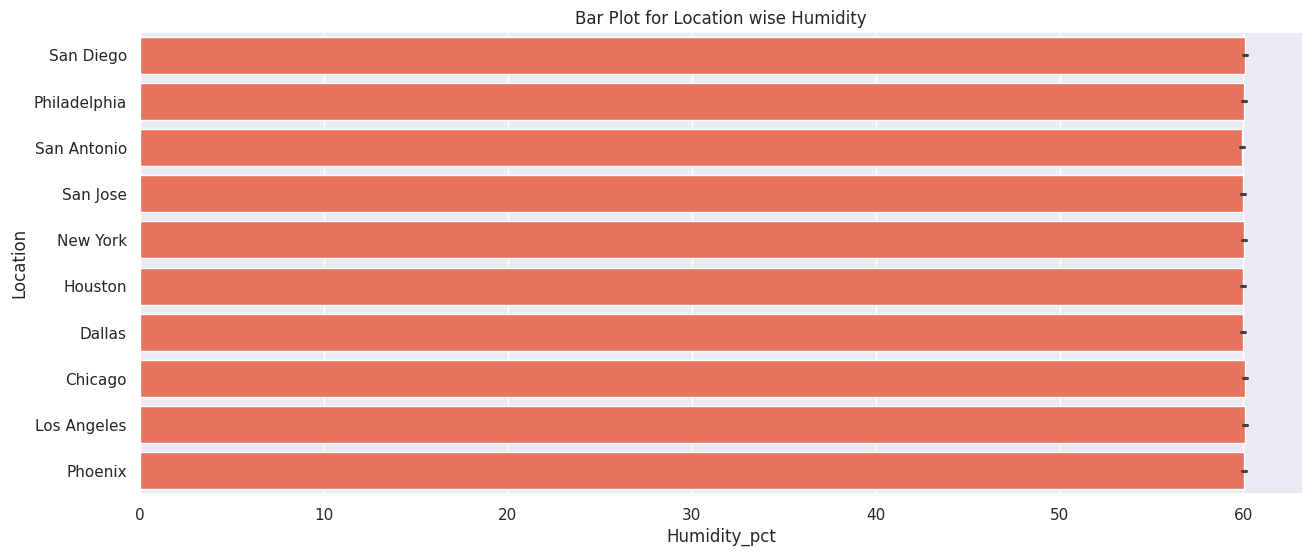

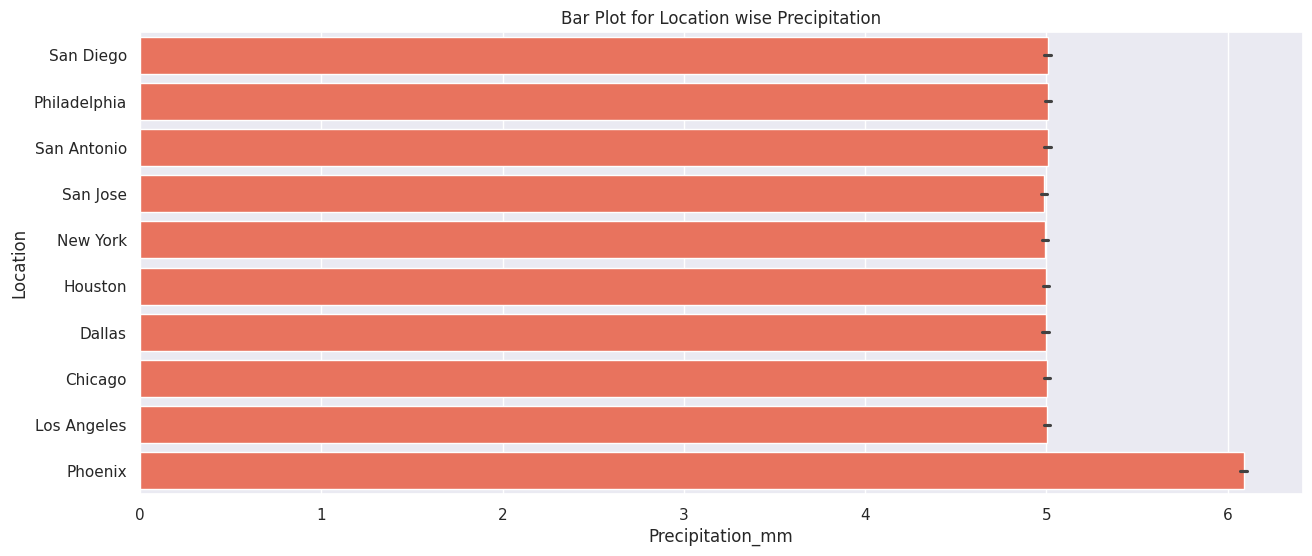

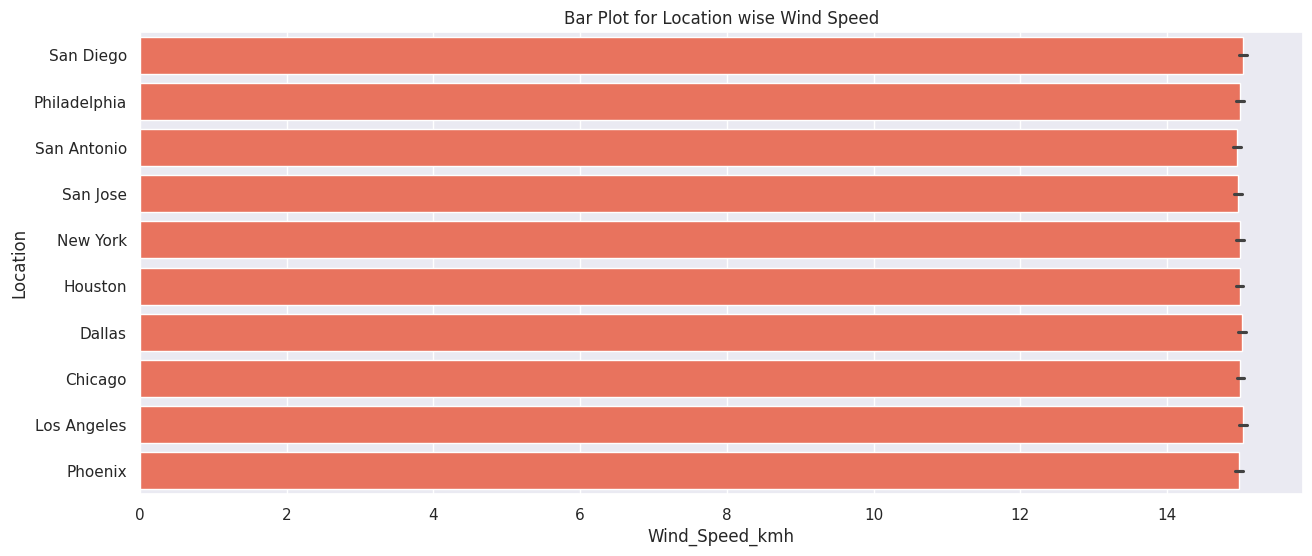

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the theme and custom palette
sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)

# Function to create KDE plots
def plot_kde(location):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[df['Location'] == location], fill=True)
    plt.title(f'Distribution of Attributes in {location}')
    plt.show()

# Function to create bar plots
def plot_bar(attribute, title):
    plt.figure(figsize=(15, 6))
    sns.barplot(x=attribute, y='Location', data=df)
    plt.title(title)
    plt.show()

# List of locations for KDE plots
locations = ['New York', 'Phoenix', 'San Jose', 'Philadelphia']

# Generate KDE plots for each location
for location in locations:
    plot_kde(location)

# Generate bar plots for specific attributes
plot_bar('Humidity_pct', 'Bar Plot for Location wise Humidity')
plot_bar('Precipitation_mm', 'Bar Plot for Location wise Precipitation')
plot_bar('Wind_Speed_kmh', 'Bar Plot for Location wise Wind Speed')


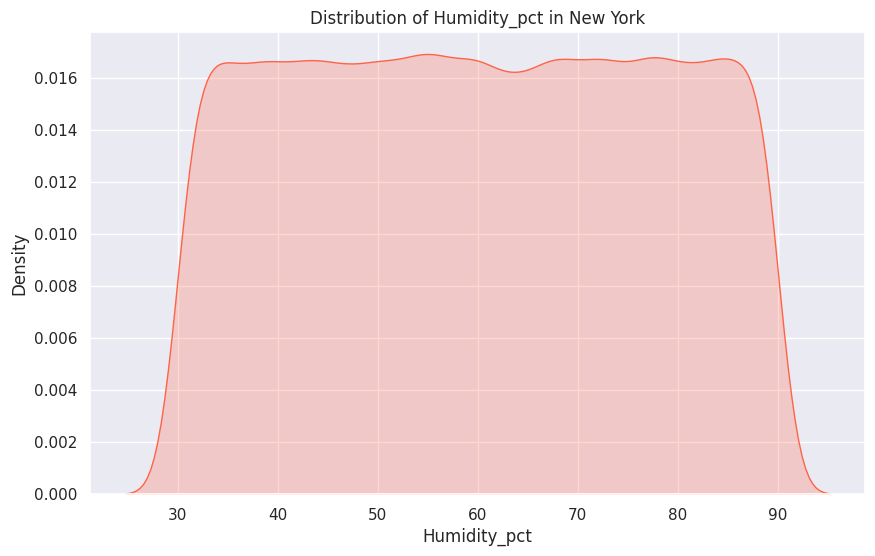

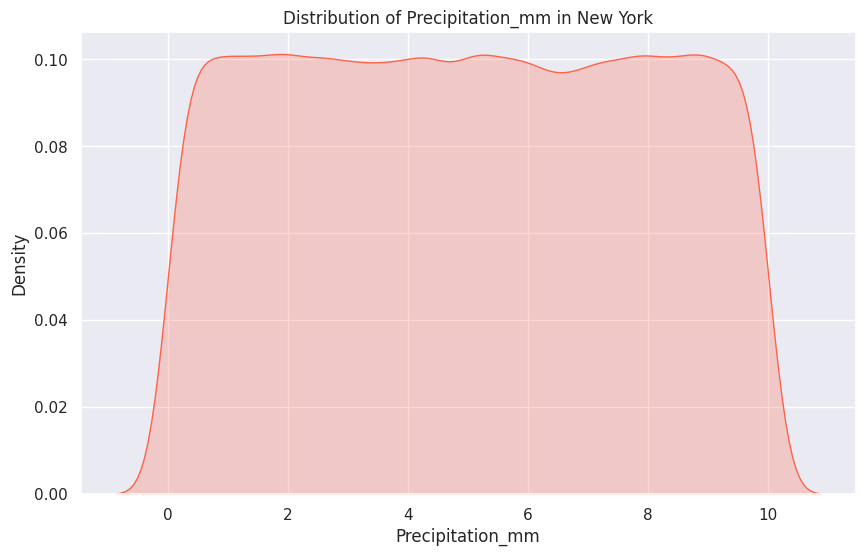

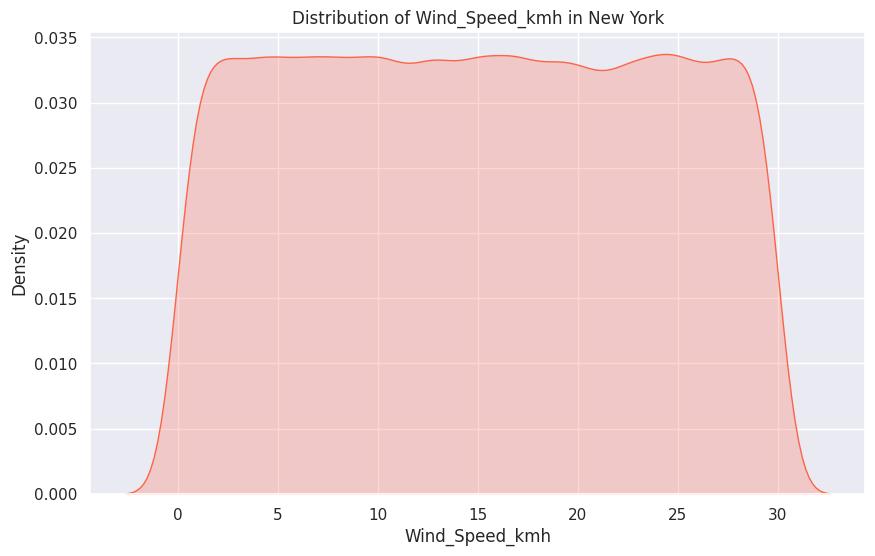

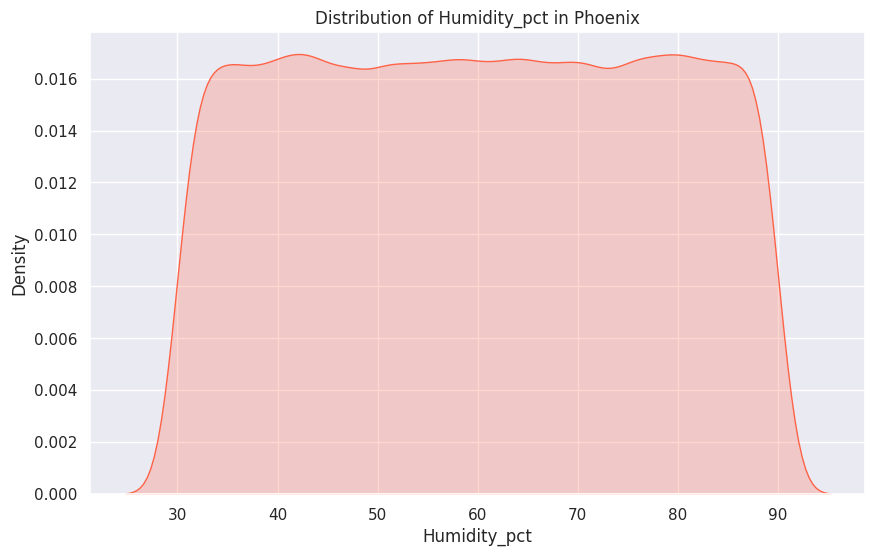

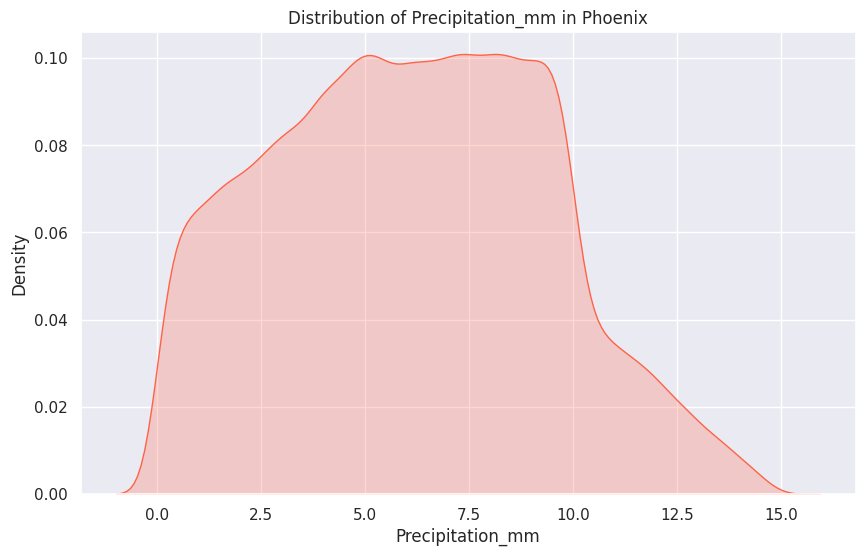

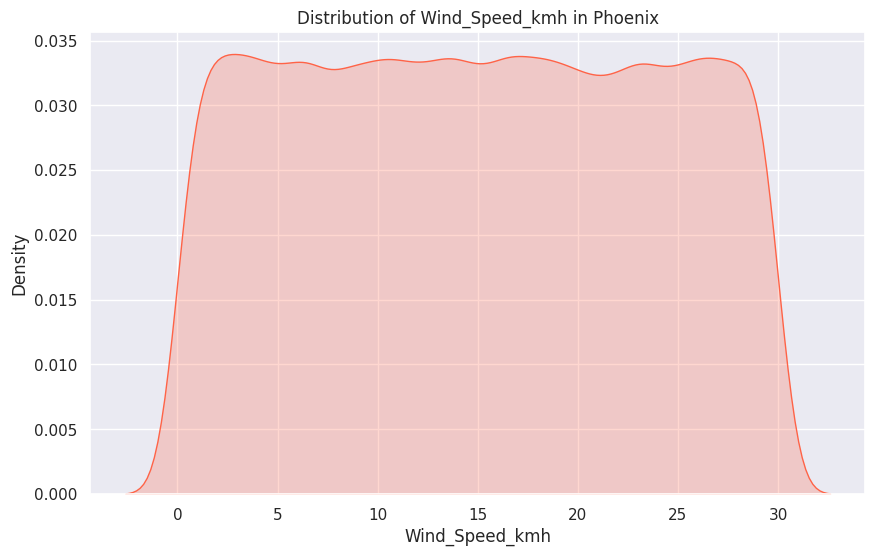

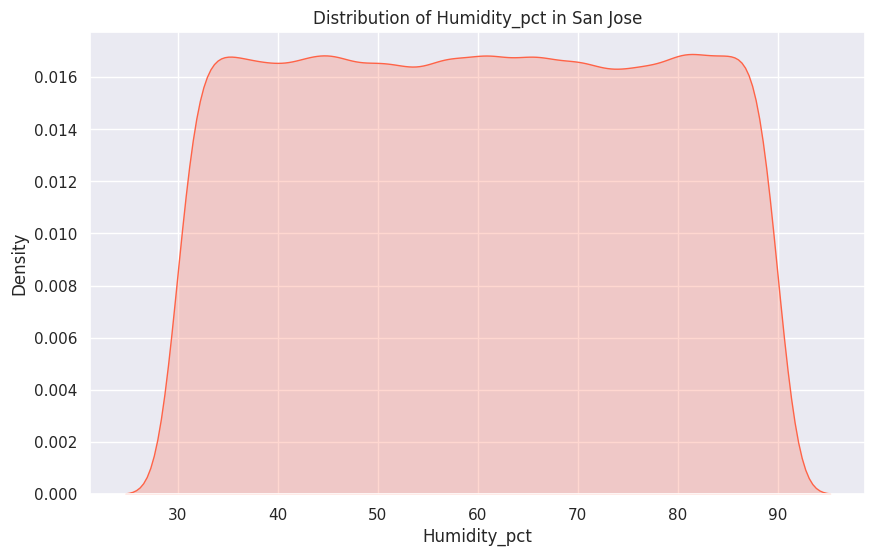

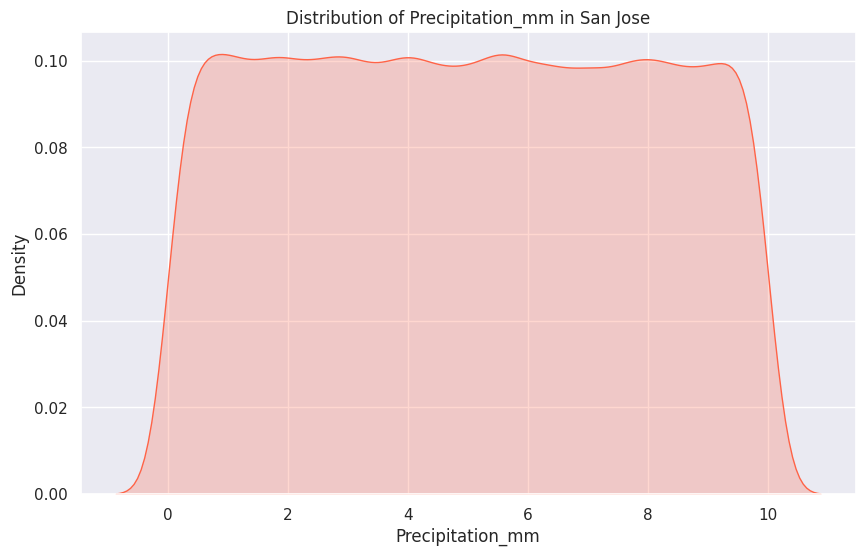

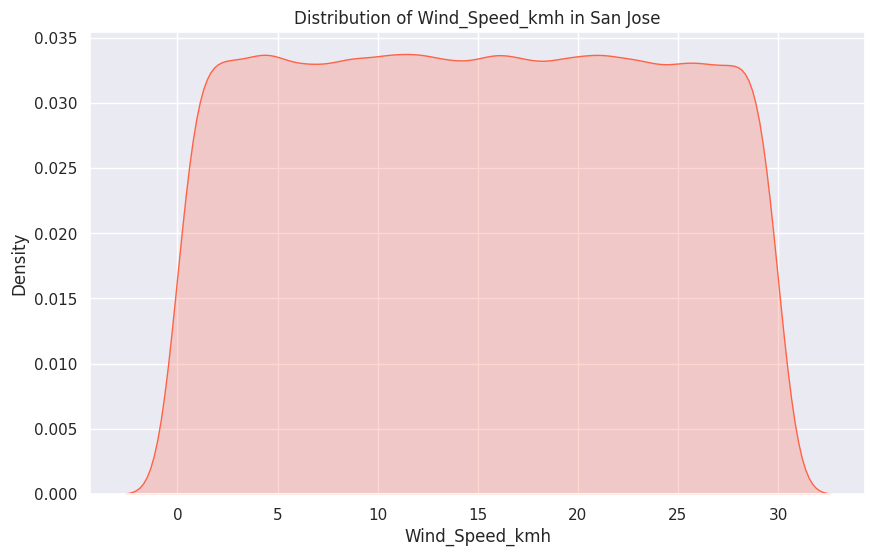

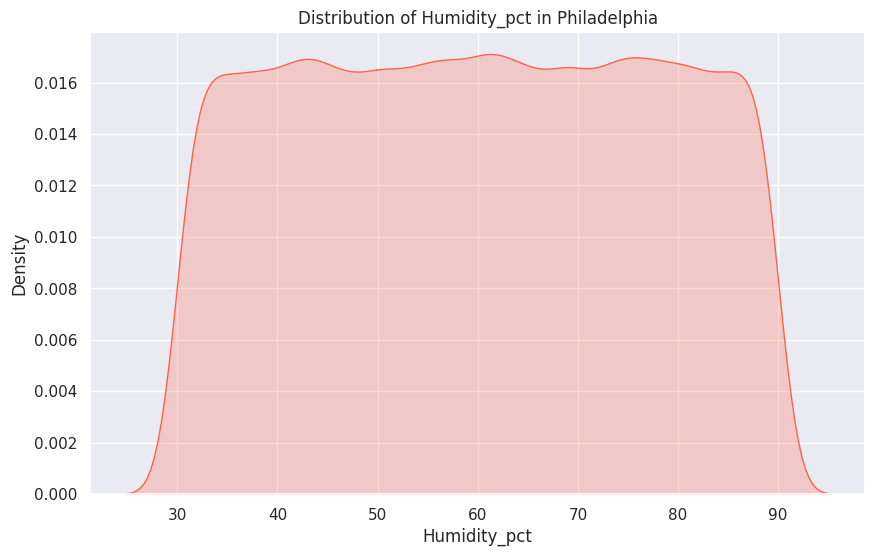

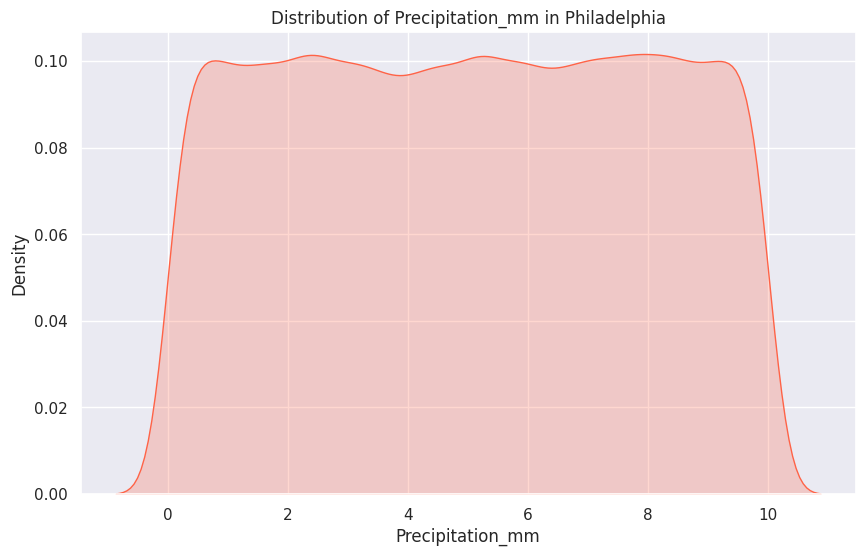

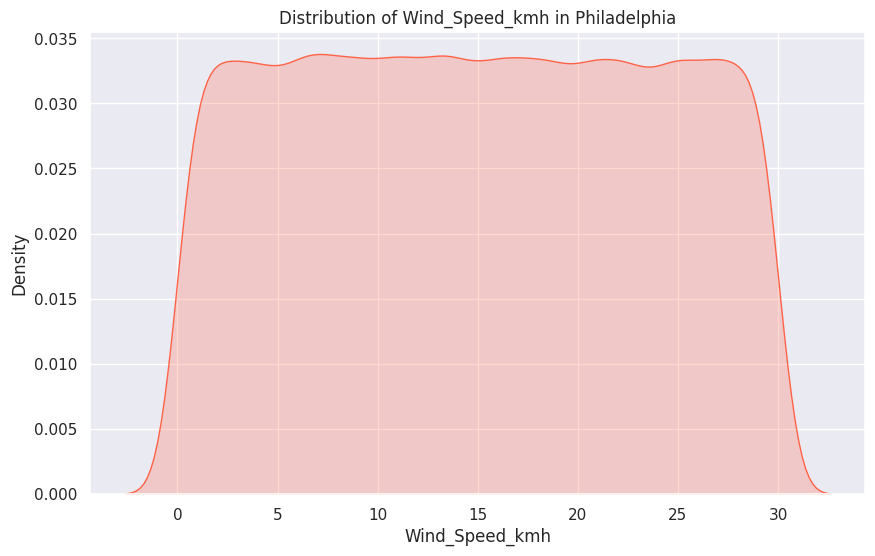

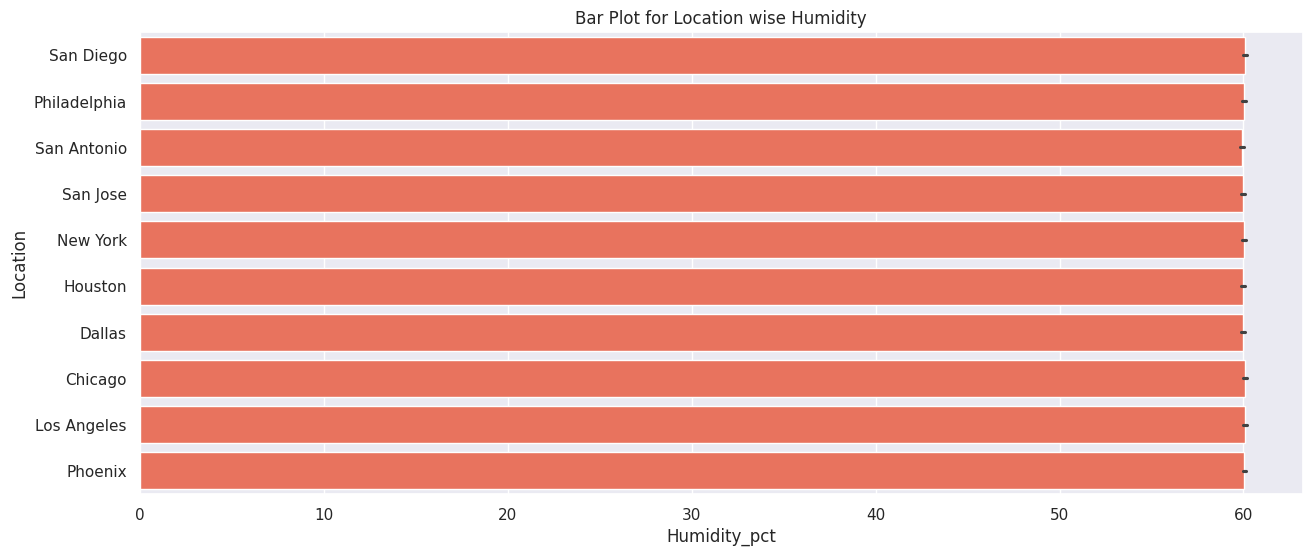

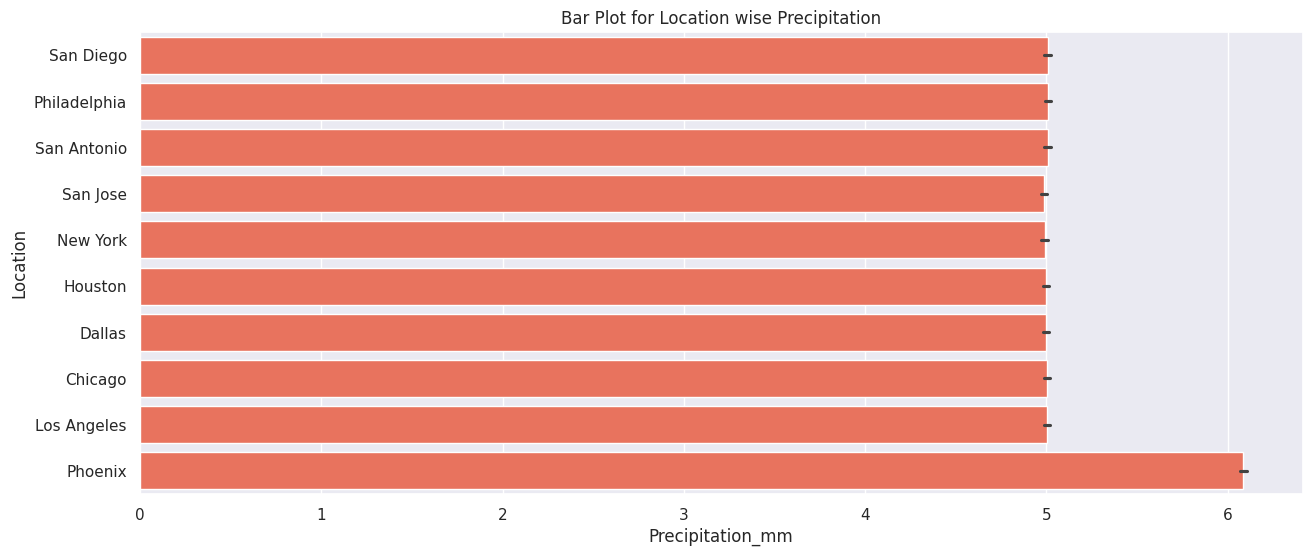

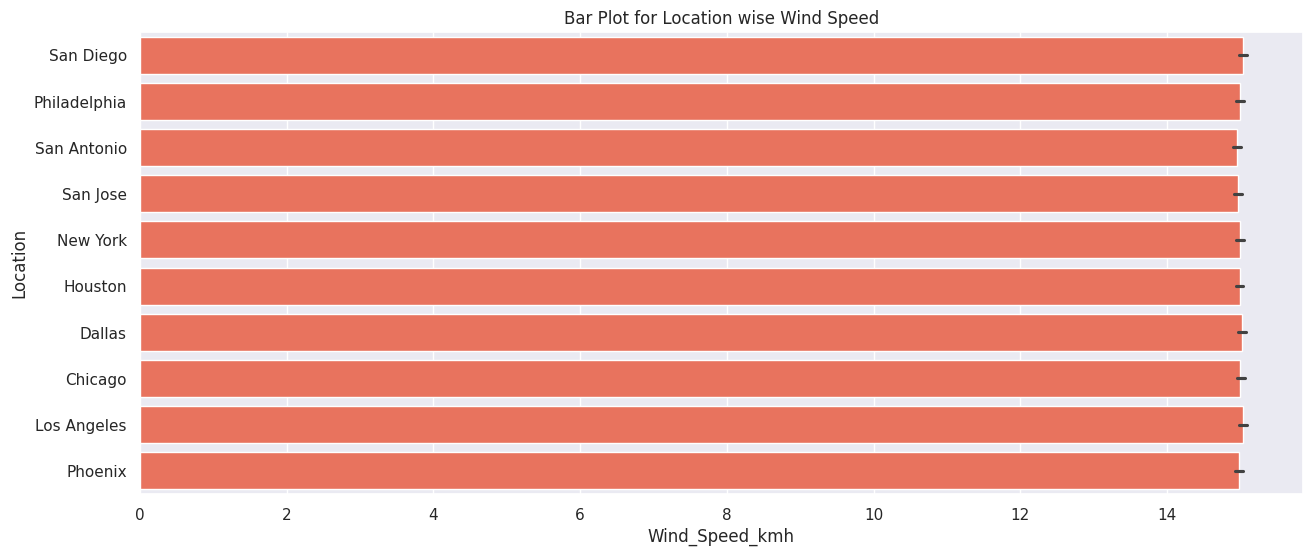

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the theme and custom palette
sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)

# Function to create KDE plots
def plot_kde(location, attribute):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[df['Location'] == location][attribute], fill=True)
    plt.title(f'Distribution of {attribute} in {location}')
    plt.show()

# Function to create bar plots
def plot_bar(attribute, title):
    plt.figure(figsize=(15, 6))
    sns.barplot(x=attribute, y='Location', data=df)
    plt.title(title)
    plt.show()

# List of locations and attributes for KDE plots
locations = ['New York', 'Phoenix', 'San Jose', 'Philadelphia']
attributes = ['Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

# Generate KDE plots for each location and attribute
for location in locations:
    for attribute in attributes:
        plot_kde(location, attribute)




In [ ]:
# Generate bar plots for specific attributes
plot_bar('Humidity_pct', 'Bar Plot for Location wise Humidity')
plot_bar('Precipitation_mm', 'Bar Plot for Location wise Precipitation')
plot_bar('Wind_Speed_kmh', 'Bar Plot for Location wise Wind Speed')

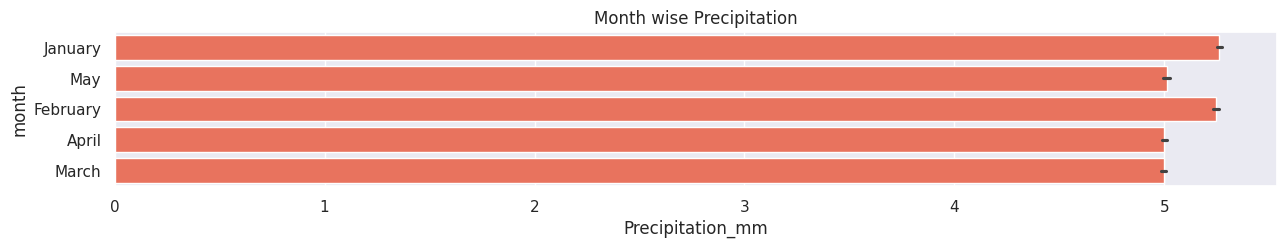

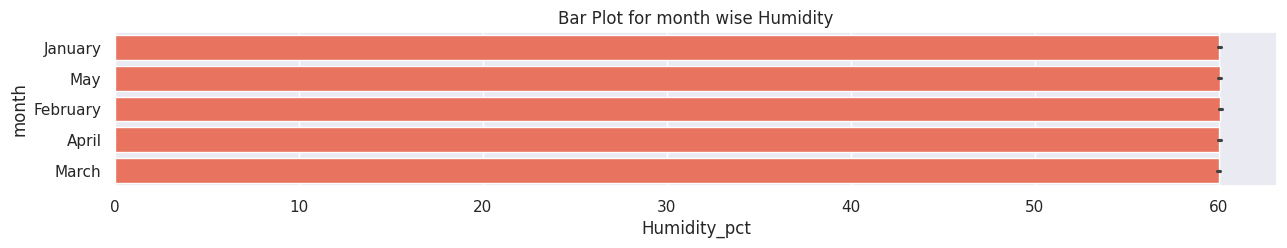

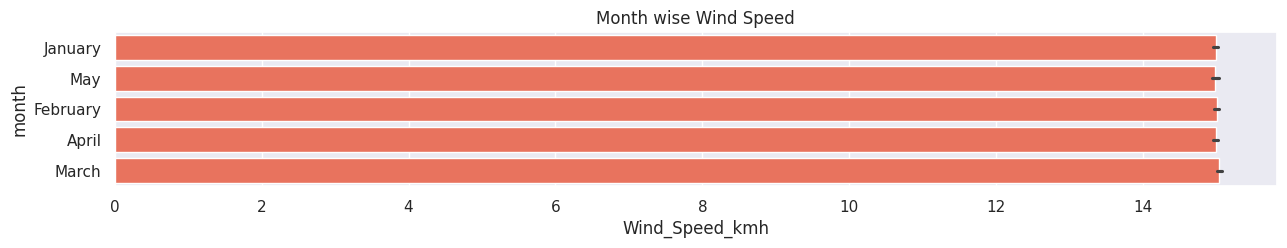

In [ ]:
sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)


plt.figure(figsize=(15, 2))
sns.barplot(x='Precipitation_mm', y='month', data=df)
plt.title('Month wise Precipitation')
plt.show()

plt.figure(figsize=(15, 2))
sns.barplot(x='Humidity_pct', y='month', data=df)
plt.title('Bar Plot for month wise Humidity')
plt.show()


plt.figure(figsize=(15, 2))
sns.barplot(x='Wind_Speed_kmh', y='month', data=df)
plt.title('Month wise Wind Speed')
plt.show()


In [ ]:
max_temp_index = df['Temperature_C'].idxmax()
max_temp_location = df.loc[max_temp_index, 'Location']
print(f'The location with the highest temperature is: {max_temp_location}')

min_temp_index = df['Temperature_C'].idxmin()
min_temp_location = df.loc[min_temp_index, 'Location']
print(f'The Location with the lowest temperature is: {min_temp_location}')


max_Humid_index = df['Humidity_pct'].idxmax()
max_Humid_location = df.loc[max_Humid_index, 'Location']
print(f'The location with the highest Humidity is: {max_Humid_location}')

min_Humid_index = df['Humidity_pct'].idxmin()
min_Humid_location = df.loc[min_Humid_index, 'Location']
print(f'The location with the lowest Humidity is: {min_Humid_location}')

The location with the highest temperature is: New York
The Location with the lowest temperature is: Phoenix
The location with the highest Humidity is: San Jose
The location with the lowest Humidity is: Philadelphia


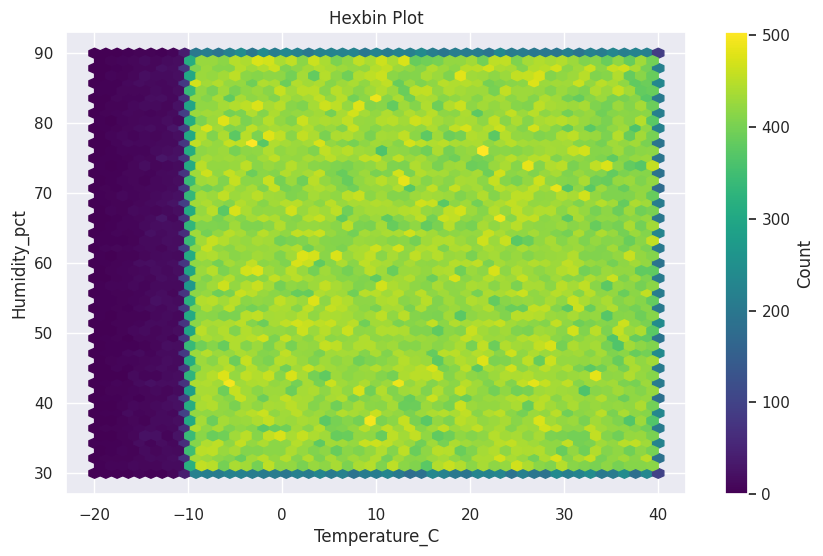

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Temperature_C'], df['Humidity_pct'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Hexbin Plot')
plt.xlabel('Temperature_C')
plt.ylabel('Humidity_pct')
plt.show()

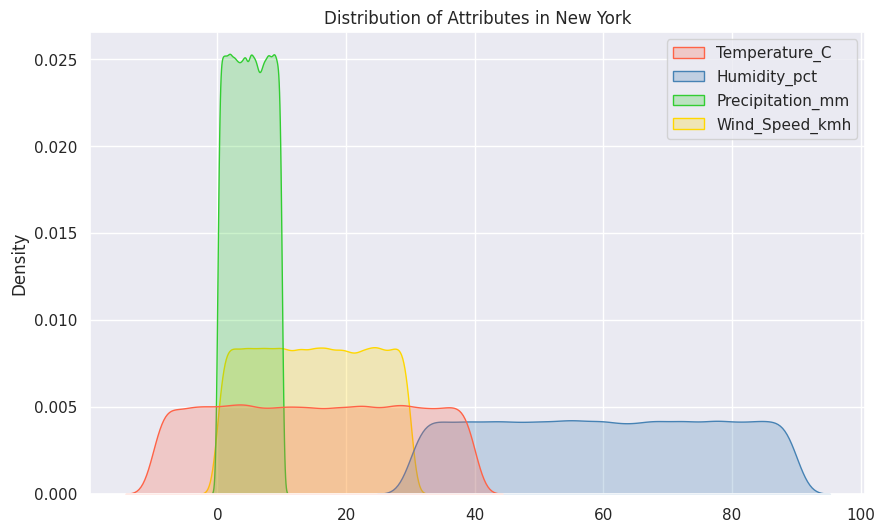

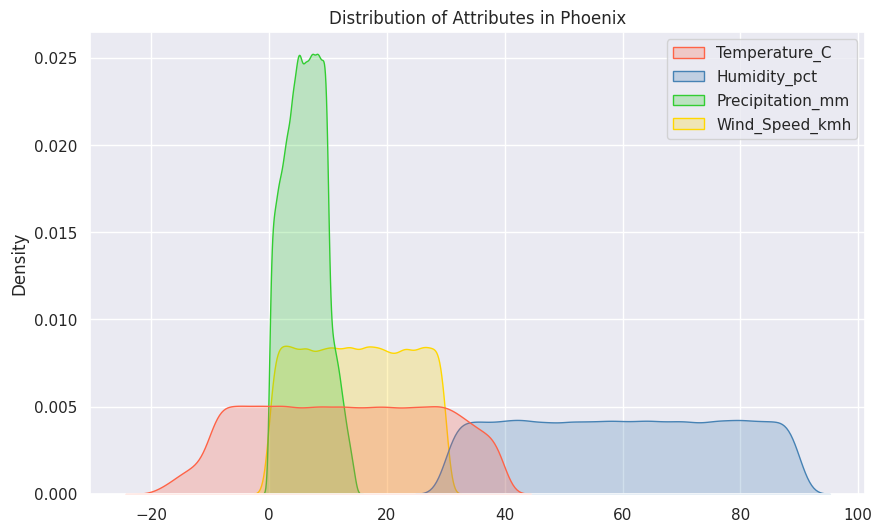

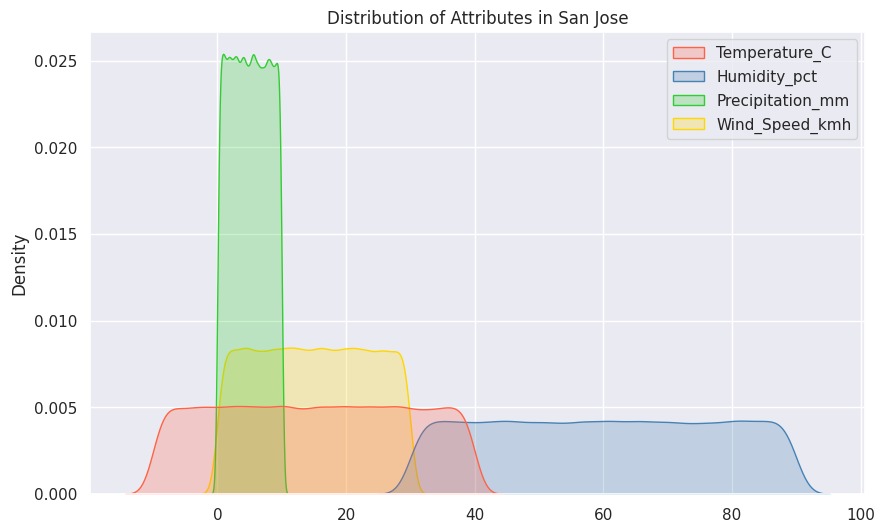

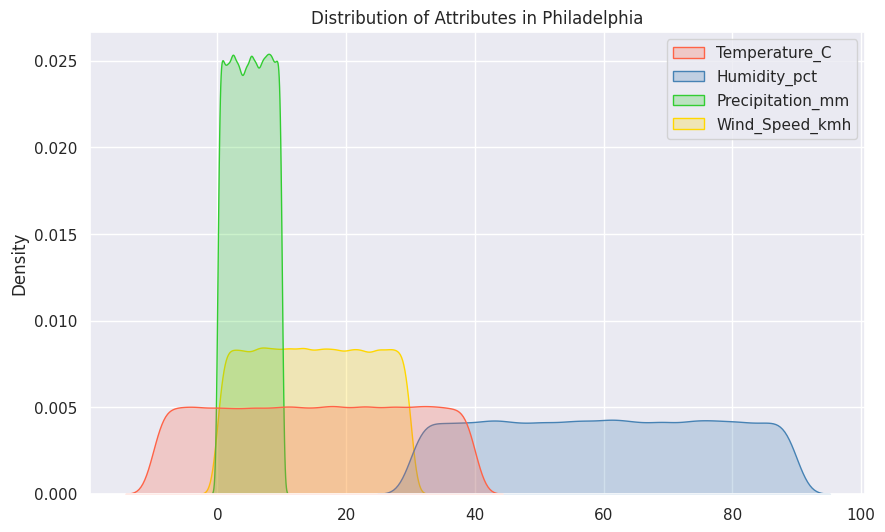

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde(location):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[df['Location'] == location], fill=True)
    plt.title(f'Distribution of Attributes in {location}')
    plt.show()

# List of locations you want to plot
locations = ['New York', 'Phoenix', 'San Jose', 'Philadelphia']

# Call the function for each location
for location in locations:
    plot_kde(location)
